<a href="https://colab.research.google.com/github/Git-Hub-Pro/ML-using-keras/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.utils.np_utils import to_categorical
from keras.models import Sequential,load_model, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [72]:
from keras.datasets import mnist
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

X_train.shape

(60000, 28, 28)

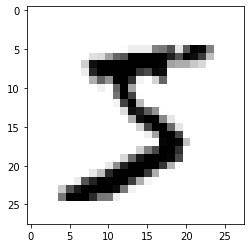

In [73]:
plt.imshow(X_train[0],cmap='binary')

In [74]:
Y_train[0]

5

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test  = X_test.reshape(-1,28,28,1) # -1 :임의로 맞춰서 넣어라

Y_train = to_categorical(Y_train)
Y_test  = to_categorical(Y_test)

X_train = X_train/255.0
X_test = X_test/255.0


In [84]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='valid',strides=1,activation='relu',input_shape=(28,28,1,)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='valid',strides=1,activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 36)          14436     
_________________________________________________________________
flatten_7 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 311,182
Trainable params: 311,182
Non-trainable params: 0
________________________________________________

In [78]:
model.fit(X_train,Y_train,batch_size=200,epochs=1,validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 2s 43us/step - loss: 0.2704 - acc: 0.9244 - val_loss: 0.0800 - val_acc: 0.9764


In [79]:
score = model.evaluate(X_test,Y_test)
print(score)

10000/10000 [==============================] - 1s 56us/step
[0.06891152080688626, 0.9788]


In [80]:
'''
=================================================================
conv2d_11 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 36)          14436     
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
=================================================================
'''
l1 = model.get_layer('conv2d_11')
l1.get_weights()
l1.get_weights()[0].shape
# (5, 5, 1, 16)
# (16,5,5,1)

(5, 5, 1, 16)

In [0]:
def plot_weight(w):

    w_min = np.min(w)
    w_max = np.max(w)

    num_grid = math.ceil(math.sqrt(w.shape[3]))
    
    fix, axis = plt.subplots(num_grid,num_grid)

    for i, ax in enumerate(axis.flat):

        if i < w.shape[3]:
            img = w[:,:,0,i]
            ax.imshow(img,vmin=w_min,vmax=w_max)
      
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

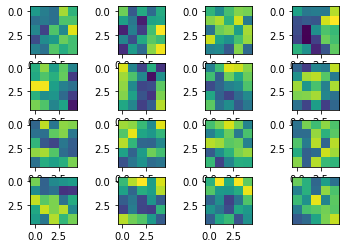

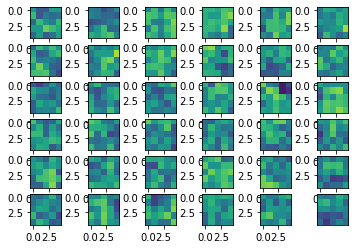

In [81]:
l1 = model.get_layer('conv2d_11')
w1 = l1.get_weights()[0]
plot_weight(w1)

l2 = model.get_layer('conv2d_12')
w2 = l2.get_weights()[0]
plot_weight(w2)

In [0]:
temp_model = Model(inputs=model.get_layer('conv2d_13').input,outputs=model.get_layer('conv2d_13').output)
output = temp_model.predict(X_test)


In [86]:
output.shape

(10000, 24, 24, 16)

In [0]:
def plot_output(output):

    num_grid = math.ceil(math.sqrt(output.shape[3]))
    
    fix, axis = plt.subplots(num_grid,num_grid)

    for i, ax in enumerate(axis.flat):

        if i < output.shape[3]:
            img = output[0,:,:,i]
            ax.imshow(img,cmap='binary')
      
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

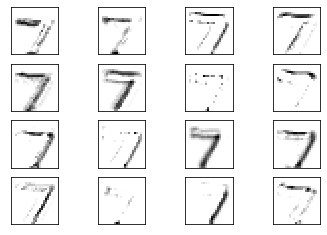

In [92]:
plot_output(output)